# Project : News Genre Prediction From The Headline
    -----------------------------------------------------------------------------------------------

## Step 1: Import Required Libraries

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2: Read the Times Of India News Data 

In [57]:
df = pd.read_csv('TOI_News.csv')
df.head()

,Headline,Genre
0,Here's why Nitesh selected Ranbir for 'Ramayana',Entertainment
1,Tanushree Dutta criticises Hema Committee report,Entertainment
2,Michael C. Hall returns to the ‘Dexter’ universe,Entertainment
3,Behind the scenes moments with Bollywood stars,Entertainment
4,Confirmed! JL files for divorce from Ben Affleck,Entertainment


In [58]:
df.tail()

,Headline,Genre
1147,Devshayani Ekadashi 2024: When is Devshayani E...,Religion
1148,"Skanda Sashti July 2024: Date, Time, Rituals a...",Religion
1149,"Vinayak Chaturthi July 2024: Date, Time, Ritua...",Religion
1150,"Ashadha Amavasya 2024: Date, Time, Rituals and...",Religion
1151,"Budh Pradosh Vrat in July 2024: Date, Time, Pu...",Religion


## Step 3: Data Pre Processing

In [59]:
df.Genre.value_counts()

Genre
Health           318
Business         274
Politics         142
Sports           132
Entertainment     75
Education         69
Religion          57
Technology        44
Life-Style        41
Name: count, dtype: int64

In [60]:
df.isnull().sum()

Headline    35
Genre        0
dtype: int64

In [61]:
df.dropna(inplace=True)

## Step 4: Data Visualization

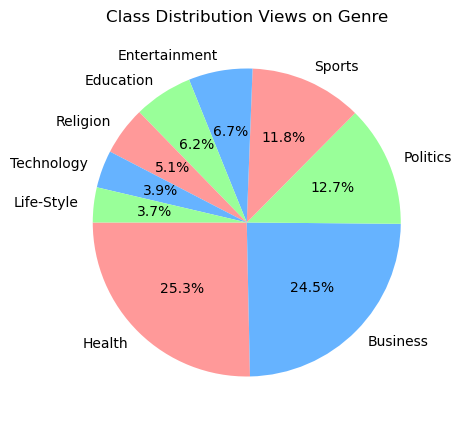

In [62]:
class_counts = df['Genre'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(class_counts, labels=class_counts.index, 
        autopct='%1.1f%%', startangle=180, 
        colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Class Distribution Views on Genre')
plt.show()

## Step 5: Splitting in training and Testing

In [63]:
X = df['Headline']
y = df['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Create Pipeline 

In [66]:
# Pipeline for Count Vectorizer + Logistic Regression
pipeline_1 = Pipeline([
    ('vect', CountVectorizer()),  
    ('clf', LogisticRegression(max_iter=1000, C=1.4))])

# Pipeline for Term Frequency-Inverse Document Frequency + SVM
pipeline_2 = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('clf', SVC(kernel='linear',C= 0.5, probability=True))])


pipeline_1.fit(X_train, y_train)
pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=0.5, kernel='linear', probability=True))])

## Step 7: Use Ensemble Method 

In [67]:
voting_clf = VotingClassifier(estimators=[
    ('logreg', pipeline_1),
    ('svm', pipeline_2)], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy * 100:.2f}%')

Ensemble Model Accuracy: 85.71%


## Step 8: Make Prediction on a New Headline

In [25]:
def predict_genre(headline):
    prediction = voting_clf.predict([headline])
    return prediction[0]


headline = input("Enter a newspaper headline: ")
predicted_genre = predict_genre(headline)
print(f'Headline : {headline}\nThe predicted genre is: {predicted_genre}')

Headline : INDIA bloc failed my expectations, Nitish Kumar says after resigning as Bihar CM: Latest developments
The predicted genre is: Politics
